In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression

import dataframe_image as dfi

In [2]:
# read in cvs as dataframe
df = pd.read_csv("../Data/socialmedia_mentalhealth.csv")
df.head()

,country,suicide_year,sex,age_range,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,m,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,m,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,f,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,m,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,m,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [3]:
# prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   suicide_year       27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age_range          27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides_100k_pop  27820 non-null  float64
 7   country_year       27820 non-null  object 
 8   HDI_for_year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  int64  
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [4]:
# view some basic statistical details
df_describe = df.describe()
df_describe

,suicide_year,suicides_no,population,suicides_100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


In [5]:
# export describe output as .png
dfi.export(df_describe, '../Images/df_describe.png', max_rows=10)

In [6]:
suicides_100k_pop_count = df.suicides_no.value_counts()
suicides_100k_pop_count

0       4281
1       1539
2       1102
3        867
4        696
        ... 
2158       1
525        1
2297       1
5241       1
2872       1
Name: suicides_no, Length: 2084, dtype: int64

In [7]:
age_range_count = df.age_range.value_counts()
age_range_count

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_range, dtype: int64

In [8]:
generation_count = df.generation.value_counts()
generation_count

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

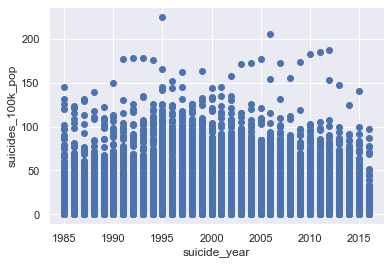

In [9]:
# scatter plot of suicide_year vs suicides_100k_pop
plt.scatter(df.suicide_year, df.suicides_100k_pop)
plt.xlabel('suicide_year')
plt.ylabel('suicides_100k_pop')
plt.show()

In [10]:
# count of rows that is United States 
country_count = df[df['country'] == 'United States'].count()
country_count

country              372
suicide_year         372
sex                  372
age_range            372
suicides_no          372
population           372
suicides_100k_pop    372
country_year         372
HDI_for_year         120
 gdp_for_year        372
gdp_per_capita       372
generation           372
dtype: int64

In [11]:
# filter dataframe to United States and suicide_year greater than or equal to 2005 
first_filter = df['country'] == 'United States'
second_filter = df.suicide_year >= 2005
data = df[first_filter & second_filter]
data.head()

,country,suicide_year,sex,age_range,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
27088,United States,2005,m,75+ years,2610,6883241,37.92,United States2005,0.897,13093726000000,47423,Silent
27089,United States,2005,m,35-54 years,10332,42835394,24.12,United States2005,0.897,13093726000000,47423,Boomers
27090,United States,2005,m,55-74 years,5190,23156114,22.41,United States2005,0.897,13093726000000,47423,Silent
27091,United States,2005,m,25-34 years,4066,20421260,19.91,United States2005,0.897,13093726000000,47423,Generation X
27092,United States,2005,m,15-24 years,3498,21647159,16.16,United States2005,0.897,13093726000000,47423,Millenials


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 27088 to 27219
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            132 non-null    object 
 1   suicide_year       132 non-null    int64  
 2   sex                132 non-null    object 
 3   age_range          132 non-null    object 
 4   suicides_no        132 non-null    int64  
 5   population         132 non-null    int64  
 6   suicides_100k_pop  132 non-null    float64
 7   country_year       132 non-null    object 
 8   HDI_for_year       72 non-null     float64
 9    gdp_for_year      132 non-null    int64  
 10  gdp_per_capita     132 non-null    int64  
 11  generation         132 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 13.4+ KB


In [13]:
# create feature X and target y
X = np.array(data.loc[:,'suicide_year']).reshape(-1,1)
y = np.array(data.loc[:,'suicides_100k_pop']).reshape(-1,1)

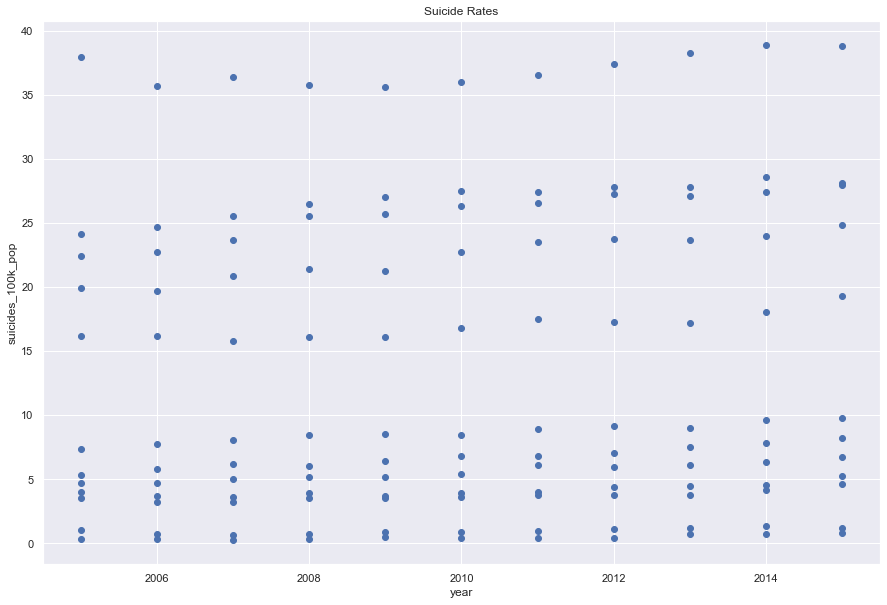

In [14]:
# Scatter plot
plt.figure(figsize=[15,10])
plt.scatter(x=X,y=y)

plt.title('Suicide Rates')
plt.xlabel('year')
plt.ylabel('suicides_100k_pop')
plt.show()